# 1. Problem Definition
Kenya experienced fuel shortage that got into a crisis with motorists getting stuck in long queues to fuel as major petrol stations reported lack of fuel. Articles related to the fuel shortage and it's cause. https://nation.africa/kenya/business/why-you-still-can-t-get-fuel-despite-uhuru-sh34bn-intervention-3773538 https://www.theeastafrican.co.ke/tea/business/fuel-crisis-kenya-to-fine-dealers-3771688

The objective here is to analyse the data from http://www.ikowhere.co.ke/fuel/ website to understand how the distribution of fuel was across petrol stations in the reported towns and areas.

We shall also seek to find out the type of fuel that was report in the petrol stations across the date of the uploaded data.

#  2. Data
Original source of the data came from http://www.ikowhere.co.ke/fuel/ the data was scrapped to be able to use in analyzing it and was saved in a csv format .

# 3. Features
The Data is composed of several columns denoted as : County ,Town, Area, Road, Fuel Type, Station and Date listed.

Web scrapping
By definition web scrapping is an automated method used to extract large amounts of data from websites. The data initially is in unstructured form through web scrapping helps in collecting it and storing it in unstructred form.

Just to give an outline of the steps undertaken when scrapping

1. Find the URL that you want to scrape
2. Inspecting the Page
3. Find the data you want to extract
4. Write the code
5. Run the code and extract the data
6. Store the data in the required format
7. perform this task we shall use Beautiful Soup which is a Python package for parsing HTML and XML documents. It is helpful to extract the data easily.

Next we clean out data then analyse it

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/petrol-location-ke-cleaned/petrol_location_ke_cleaned.csv
/kaggle/input/petrol-location-ke/petrol_location_ke.csv


In [2]:
import requests
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [3]:
#Create an URL oject
URL= "http://www.ikowhere.co.ke/"
#Create an object page
page=requests.get(URL)
page #Response 200 means the server allows us to collect data from their website

#Parser-lxml = Change html to Python friendly format
#Obtain page's information
soup = BeautifulSoup(page.text,'lxml')


#Obtain information from tag <table>
table1=soup.find('table',id='customers')


# # # CREATE A COLUMN LIST
After the table1 has been created now the next thing we can do is inspecting the location of each column. If we look into each column we notice that they have the same characteristic.

After we found the tag of each column the next thing we can do is create a for loop to fill an empty list with each column. We define an empty list as headers.

In [4]:
#Obtain every title of columns with tag <th>
headers=[]
for i in table1.find_all('th'):
    title=i.text
    headers.append(title)
    
#Covert wrapped text in column 5 into one line text
print(headers)
#After the list of columns is made the next thing we can do is create a dataframe. We define the dataframe as mydata.

['County', 'Town', 'Area', 'Road', 'Fuel Type', 'Station ', 'Date listed', 'Click link for details']


# # #  CREATE A DATA FRAME
After the dataframe is created now we can fill it with items in each column. Before we create a for loop, we need to identify the location of the row and item column first.

we can identify that the row is located under tag tr and items are located under tag td . This is applied to all rows and items within the table.

After we found the tags now we can create a for loop.

In [5]:
#Create a dataframe 
mydata=pd.DataFrame(columns=headers)


#Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data=j.find_all('td')
    row=[i.text for i in row_data]
    length=len(mydata)
    mydata.loc[length]=row

In [6]:
#Data frame filled with data
mydata.head()
#Reading our saved data frame in a csv file 
scrapped_data=pd.read_csv('../input/petrol-location-ke/petrol_location_ke.csv')
#Getting an overview information of our scrapped dataset
scrapped_data.info()
#Getting a summary of the first 7 rows of our data set
scrapped_data.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   County                  550 non-null    object
 1   Town                    550 non-null    object
 2   Area                    550 non-null    object
 3   Road                    550 non-null    object
 4   Fuel Type               550 non-null    object
 5   Station                 550 non-null    object
 6   Date listed             550 non-null    object
 7   Click link for details  550 non-null    object
dtypes: object(8)
memory usage: 34.5+ KB


,County,Town,Area,Road,Fuel Type,Station,Date listed,Click link for details
0,Nairobi,Nairobi,None,None,Diesel,National Oil,"April 19, 2022, 1:44 p.m.",Details
1,Nairobi,Nairobi,None,None,Diesel,National Oil,"April 19, 2022, 1:43 p.m.",Details
2,Nairobi,Nairobi,CBD - Central Business District,Haile Selassie ave,Both Super & Diesel,National Oil,"April 19, 2022, 1:41 p.m.",Details
3,Nairobi,Nairobi,Karen,Dennis Pritt rd,Both Super & Diesel,Rubis,"April 19, 2022, 1:20 p.m.",Details
4,Uasin Gishu,Eldoret,None,None,Both Super & Diesel,Luqman,"April 19, 2022, 2:26 a.m.",Details
5,Nairobi,Nairobi,Westlands,Waiyaki way,Both Super & Diesel,Shell,"April 18, 2022, 12:28 p.m.",Details
6,Laikipia,Nanyuki,None,Nyeri - Nanyuki rd,Super/Petrol,Shell,"April 18, 2022, 10:20 a.m.",Details


From the scrapped dataset above it shows there missing values . The next step will be handle this missing values the creteria will be to fill them with the mode of the column values as well as check the correct input by researching further.

As an example is where a county name is chosen but corresponding area does not much with the road selected. Much of a data analyst and a data scientist time is spent in cleaning and working on data before using it .

After cleanin the data below we are left with 505 rows out of the 550 rows in our initial dataset.

# 4. Data Cleaning

In [7]:
#Read the saved csv file 
petrol_data=pd.read_csv('../input/petrol-location-ke/petrol_location_ke.csv')
print(petrol_data.info())
petrol_data.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   County                  550 non-null    object
 1   Town                    550 non-null    object
 2   Area                    550 non-null    object
 3   Road                    550 non-null    object
 4   Fuel Type               550 non-null    object
 5   Station                 550 non-null    object
 6   Date listed             550 non-null    object
 7   Click link for details  550 non-null    object
dtypes: object(8)
memory usage: 34.5+ KB
None


,County,Town,Area,Road,Fuel Type,Station,Date listed,Click link for details
0,Nairobi,Nairobi,None,None,Diesel,National Oil,"April 19, 2022, 1:44 p.m.",Details
1,Nairobi,Nairobi,None,None,Diesel,National Oil,"April 19, 2022, 1:43 p.m.",Details
2,Nairobi,Nairobi,CBD - Central Business District,Haile Selassie ave,Both Super & Diesel,National Oil,"April 19, 2022, 1:41 p.m.",Details
3,Nairobi,Nairobi,Karen,Dennis Pritt rd,Both Super & Diesel,Rubis,"April 19, 2022, 1:20 p.m.",Details
4,Uasin Gishu,Eldoret,None,None,Both Super & Diesel,Luqman,"April 19, 2022, 2:26 a.m.",Details
5,Nairobi,Nairobi,Westlands,Waiyaki way,Both Super & Diesel,Shell,"April 18, 2022, 12:28 p.m.",Details
6,Laikipia,Nanyuki,None,Nyeri - Nanyuki rd,Super/Petrol,Shell,"April 18, 2022, 10:20 a.m.",Details


In [8]:
#Removing the Click link for details column as we shall not be needing it
petrol_data.drop('Click link for details',axis=1,inplace=True)
#Our data has null values where some fields have missing values indicated as None
petrol_data.head()

,County,Town,Area,Road,Fuel Type,Station,Date listed
0,Nairobi,Nairobi,None,None,Diesel,National Oil,"April 19, 2022, 1:44 p.m."
1,Nairobi,Nairobi,None,None,Diesel,National Oil,"April 19, 2022, 1:43 p.m."
2,Nairobi,Nairobi,CBD - Central Business District,Haile Selassie ave,Both Super & Diesel,National Oil,"April 19, 2022, 1:41 p.m."
3,Nairobi,Nairobi,Karen,Dennis Pritt rd,Both Super & Diesel,Rubis,"April 19, 2022, 1:20 p.m."
4,Uasin Gishu,Eldoret,None,None,Both Super & Diesel,Luqman,"April 19, 2022, 2:26 a.m."


In [9]:
# # #splitting our Date listed column into date and time into a dd/mm/yy format and creating new columns
petrol_data['Day']=petrol_data['Date listed'].apply(lambda x: x.split(',')[0])
petrol_data['Date']=petrol_data['Day'].apply(lambda x: x.split(' ')[2])
petrol_data['Month']=petrol_data['Day'].apply(lambda x: x.split(' ')[1])
petrol_data['Year']=petrol_data['Date listed'].apply(lambda x: x.split(',')[1])
petrol_data['Time']=petrol_data['Date listed'].apply(lambda x: x.split(',')[2])
#Drop the Date listed  and Day columns from our dataset
petrol_data.drop(['Date listed','Day'],axis=1,inplace=True)

In [10]:
#save and load our date to csv format and load it 
petrol_data=pd.read_csv('../input/petrol-location-ke-cleaned/petrol_location_ke_cleaned.csv')

For the sake of analyzing this data based on the current state this project follows just the recent fuel shortage in Kenya for the month of april 2022 the month and year column will not be in use much.

In [11]:
petrol_data.head()

,County,Town,Area,Road,Fuel Type,Station,Date,Month,Year,Time
0,Nairobi,Nairobi,CBD - Central Business District,Haile Selassie ave,Diesel,National Oil,19,April,2022,1:44 p.m.
1,Nairobi,Nairobi,CBD - Central Business District,Haile Selassie ave,Diesel,National Oil,19,April,2022,1:43 p.m.
2,Nairobi,Nairobi,CBD - Central Business District,Haile Selassie ave,Both Super & Diesel,National Oil,19,April,2022,1:41 p.m.
3,Nairobi,Nairobi,Hurlingham,Argwings Kodhek Rd,Both Super & Diesel,Rubis,19,April,2022,1:20 p.m.
4,Nairobi,Nairobi,Westlands,Waiyaki way,Both Super & Diesel,Shell,18,April,2022,12:28 p.m.


#  5. Data visualization
Visualizing petrol station's distribution
Here we want to get a general view of the various reported petrol stations from our dataset

In [12]:
petrol_station=petrol_data['Station '].value_counts()
colors=['mediumturquoise','darkorange','gold','lightgreen']
trace=go.Pie(values=(np.array((petrol_station/petrol_station.sum())*100)),labels=(np.array(petrol_station.index)))
layout=go.Layout(title='Petrol Stations')
data=[trace]
fig=go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors,line=dict(color='#000000',width=2)))
fig.show()
#py.plot(fig)

From the pie chart above we find out that from the reported petrol stations Total petrol station was the most reported to have fuel at 33.3% followed by Shell at 29.1% ,Rubis at 21% ,Ola/Oil Libya at 3.37% and Petrocity at 2.57%.

Petrol stations such as Delta,National Oil,Luqman,Hass and Others not captured from the list were reported to have fuel but but were not the majority as compared to shell or Total as they fell below 2% and above 1%.

##  Visualizing fuel type distribution

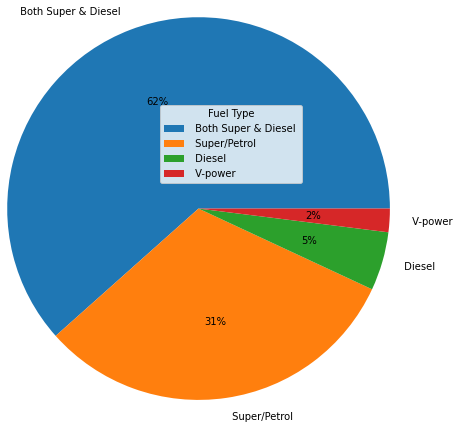

In [13]:
fuel_type=petrol_data['Fuel Type'].value_counts()
fuel_labels=(np.array(fuel_type.index))
plt.pie(fuel_type,labels=fuel_labels,radius = 2.2,autopct='%.0f%%')
plt.legend(title='Fuel Type')
plt.show()

When in comes to the most common type of fuel available, majority of the fuel stations had both Super&Diesel reported at 62% while those with only Super/Petrol without Diesel were at 31% . Diesel and V-power only fuel types were at 5% and 2% respectively available from the listed petrol stations.

### Petrol Station Distribution with relation to the Fuel Type

In [14]:
#Petrol  Station Vs Fuel Type 
fuel_station=petrol_data.loc[:,["Fuel Type","Station "]].groupby(["Fuel Type","Station "]).size().reset_index()
fuel_station.columns=["Fuel Type","Station","Count"]
fig=px.bar(fuel_station,x='Station',y='Count',color="Fuel Type",
          barmode='group',title="Petrol Station Distribution in relation to Fuel Type",
          height=500,width=900)
fig.update_traces(marker_line_color='rgb(9,50,100)',marker_line_width=1.5,opacity=0.6)
fig.show()

Petrol stations,Total,Shell and Rubis had higher chances to find Both Super & Diesel,Super/Petrol and Diesel only fuel types compared to other petrol stations.

Here we find out that a majority of Total petrol stations had both Super and Diesel fuel type with some reported only to have Super/Petrol and Diesel fuel types.Meaning the was a higher likely wood to find both Super&Diesel fuel type at a majority of Total petrol station followed by shell and Rubis petrol stations respectively.

Shell petrol station due to the ongoing fuel shortage they had motorists buying their V-power in areas where there was no alternative.

Petrol stations Delta,Ola/Oil Libya and Petrocity had equal distribution of both Super & Diesel fuel type.

### Petrol Station Distribution in relation to the Counties

In [15]:
#Fuel Type vs County
fuel_station=petrol_data.loc[:,["Station ","County"]].groupby(["Station ","County"]).size().reset_index()
fuel_station.columns=["Station ","County","Count"]
fig=px.bar(fuel_station,x='County',y='Count',color="Station ",
          barmode='group',title="Petrol Station Distribution in relation to County",
          height=500,width=1500)
fig.update_traces(marker_line_color='rgb(9,50,100)',marker_line_width=1.5,opacity=0.8)
fig.show()

Majority of the petrol stations reported were within Nairobi county followed by Kiambu ,Machakos,Mombasa and Nakuru counties.

### Petrol Station Distribution in relation to the Area

In [16]:
#Fuel Type vs Area
fuel_station=petrol_data.loc[:,["Fuel Type","Area"]].groupby(["Fuel Type","Area"]).size().reset_index()
fuel_station.columns=["Fuel Type","Area","Count"]
fig=px.bar(fuel_station,x='Area',y='Count',color="Fuel Type",
          barmode='group',title="Petrol Station Distribution in relation to it's Area",
          height=800,width=2000)
fig.update_traces(marker_line_color='rgb(9,50,100)',marker_line_width=1.5,opacity=0.8)
fig.show()

Karen are reported high availability of both Super&Diesel fuel type,followed by Nairobi's CBD area,Westlands area ,Hurlingham,Langata,Ruiru and Ruaka areas respectively.

Petrol stations with only super/petrol were found in areas such as Gikomba,Joska,Kenyatta University,Kongowea,Mihango,Nanyuki,Racecourse,Zimmerman,Githunguri,Kahawest,Kangemi,Kwa Ng'ethe,Machakos,Nyayo stadium and Parklands.

### Petrol Station fuel availability in relation to the Road

In [17]:
#Petrol Station vs Road
fuel_station=petrol_data.loc[:,["Station ","Road"]].groupby(["Station ","Road"]).size().reset_index()
fuel_station.columns=["Station","Road","Count"]
fig=px.bar(fuel_station,x='Road',y='Count',color="Station",
          barmode='group',title="Petrol Station fuel availability vs Reported Road",
          height=500,width=3100)
fig.update_traces(marker_line_color='rgb(9,50,100)',marker_line_width=1.5,opacity=0.8)
fig.show()

The Petrol stations near Limuru Rd were the majority reported to have fuel,followed by those along Thika rd , Mombasa rd and Waiyaki way.Then those along Dennis Pritt rd,Langata rd and Eastern Bypass rd, James Gichuru rd.

### Fuel Type Distribution with relation to Town

In [18]:
fuel_Area=petrol_data.loc[:,["Fuel Type","Town"]].groupby(["Fuel Type","Town"]).size().reset_index()
fuel_Area.columns=["Fuel Type","Town","Count"]
fig=px.bar(fuel_Area,x='Town',y='Count',color="Fuel Type",
          barmode='group',title="Fuel Type Distribution with Town",
          height=600,width=900,)
fig.update_traces(marker_line_color='rgb(9,50,100)',marker_line_width=1.5,opacity=0.8)
fig.show()

This is where the bias in data comes in ,from the data collection point majority of the data from Nairobi and it's environs were easy to capture compared to outside Nairobi in Towns such as Eldoret,Nanyuki,Kilifi some road names were not indicated.

This was an abrupt solution I believe the ikowhere.co.ke team as they continue to develop their platform more data will be easily captured.

Both Super & Diesel fuel type were the most reported available fuel type from the petrol stations captured,worth noting is V-power was reported majorly available in Nairobi and it's satellite towns, in Nanyuki Super/Petrol was the only reported fuel type.

### Petrol Station Distribution based on Date

In [19]:
fuel_date=petrol_data.loc[:,["Station ","Date"]].groupby(["Station ","Date"]).size().reset_index()
fuel_date.columns=["Station ","Date","Count"]
fig=px.bar(fuel_date,x="Date",y='Count',color="Station ",
          barmode='group',title="Date Distribution and Station",
          height=600,width=1100)
fig.update_traces(marker_line_color='rgb(9,50,100)',marker_line_width=1.5,opacity=0.8)
fig.show()

From the uploaded data most reporting happened between Date 13 and 15 of April 2022.This is the same week that guys got to learn about the site and also when the revised petroleum prices were to begin from the 15th.

# 6. Summary
1. Worth noting is after 15th with the new prices fuel was available across the petrol station hence the low uptake to report availability of    fuel.

2. Most motorists fuelled at Tota or Shell followed by Rubis.

3. The website got a spike of guys uploading information during the peek of the shortage from the dates of 13-15th April 2022.

4. The focus is mostly covering Nairobi and it's environs it couls be also great to have other towns details captured well as mostly are left    as None or Other (spesific rd name)

5. This analysis was based on a small dataset just to highlight how the fuel availability fared across the petrol stations in the areas          reported future work would involve capturing a large dataset. A machine learning model could be be explored using this dataset to predict    the availability of fuel in a give petrol station given a set of features.

Looking forward to your feedback in the comment section also kindly UPVOTE and motivate a beginner here!!!